<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 0 - upload file and initial preview
from google.colab import files
uploaded = files.upload()

import io, os, sys
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

print("Uploaded files:", list(uploaded.keys()))
# select first csv uploaded
csv_files = [f for f in uploaded.keys() if f.lower().endswith('.csv')]
if len(csv_files) == 0:
    raise FileNotFoundError("No CSV uploaded. Please upload the Wine CSV (e.g., WineQT.csv).")
datafile = csv_files[0]
print("Using file:", datafile)

df = pd.read_csv(io.BytesIO(uploaded[datafile]))
print("First 5 rows:")
display(df.head())
print("Shape:", df.shape)


Saving WineQT.csv to WineQT.csv
Uploaded files: ['WineQT.csv']
Using file: WineQT.csv
First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Shape: (1143, 13)


In [ ]:
# Cell 1 - EDA
print("--- dtypes & non-null counts ---")
display(df.info())

print("\n--- descriptive statistics (numeric) ---")
display(df.describe().transpose())

print("\n--- Missing values per column ---")
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing>0])

# Show value counts of quality
if 'quality' in df.columns:
    print("\nQuality value counts:")
    display(df['quality'].value_counts().sort_index())
else:
    print("No 'quality' column detected. Columns:", df.columns.tolist())


--- dtypes & non-null counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None


--- descriptive statistics (numeric) ---


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000



--- Missing values per column ---


,0



Quality value counts:


,count
quality,
3,6
4,33
5,483
6,462
7,143
8,16


In [ ]:
# Cell 2 - cleaning
# Drop exact duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape[0]
print(f"Dropped duplicates: {before-after} rows removed, new shape: {df.shape}")

# If any non-numeric columns present, show them
non_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns (if any):", non_numeric)

# If semicolon-delimited single column (some wine datasets use ;), try to fix:
if len(df.columns)==1 and ';' in df.columns[0]:
    print("Detected semicolon-delimited single column. Attempting to split...")
    df = pd.read_csv(io.BytesIO(uploaded[datafile]), sep=';')
    display(df.head())
    print("New shape:", df.shape)


Dropped duplicates: 0 rows removed, new shape: (1143, 13)
Non-numeric columns (if any): []


In [ ]:
# Cell 3 - prepare X and y
# Ensure 'quality' exists
if 'quality' not in df.columns:
    raise KeyError("Column 'quality' not found. Please ensure the uploaded file contains 'quality' column.")
target = 'quality'

# Features and target
X = df.drop(columns=[target])
y = df[target].copy()

# Quick train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique()<=10 else None)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("y train distribution:")
display(y_train.value_counts().sort_index())


Train shape: (914, 12) Test shape: (229, 12)
y train distribution:


,count
quality,
3,5
4,26
5,386
6,370
7,114
8,13


In [ ]:
# Cell 4 - preprocess: fill missing (median), scale numeric features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Imputer+scaler pipeline
preproc = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Fit transform on train, transform on test
X_train_proc = pd.DataFrame(preproc.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)
X_test_proc  = pd.DataFrame(preproc.transform(X_test[numeric_cols]), columns=numeric_cols, index=X_test.index)

print("Processed feature sample (train):")
display(X_train_proc.head())


Numeric columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']
Processed feature sample (train):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
819,-0.012101,0.388684,-0.109113,-0.264324,0.609897,-0.643427,-0.236286,-0.299229,-1.039511,-0.731171,-0.608473,0.753824
357,1.248615,-1.626485,0.761211,-0.600511,-0.208555,-0.942939,-0.719059,0.454173,-0.649907,2.263064,0.330960,-0.647811
385,0.675563,-0.394993,1.119580,3.181593,-0.468065,-1.042777,-0.869926,1.082009,-0.649907,0.420458,0.518847,-0.568148
1057,-1.559342,0.500638,-1.235414,-0.852652,-0.148669,-0.942939,-0.990619,-0.916601,2.272119,-0.212938,-0.326643,1.453564
161,0.331731,0.332708,1.170776,-0.432418,4.981632,1.153646,1.061167,-0.173662,-1.753784,5.487625,-0.890303,-1.246358


In [ ]:
# Cell 5 - Regression baseline with LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_proc, y_train)
y_pred_lr = lr.predict(X_test_proc)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("LinearRegression (regression) results:")
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


LinearRegression (regression) results:
RMSE: 0.6277, MAE: 0.4830, R2: 0.3892


In [ ]:
# Cell 6 - RandomForestRegressor with simple grid search (short)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {'n_estimators':[100], 'max_depth':[8, 12, None]}  # small grid to run quickly

gs = GridSearchCV(rfr, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
gs.fit(X_train_proc, y_train)

print("Best params:", gs.best_params_)
best_rfr = gs.best_estimator_

y_pred_rfr = best_rfr.predict(X_test_proc)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print(f"RandomForest test RMSE: {rmse_rfr:.4f}, R2: {r2_score(y_test, y_pred_rfr):.4f}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best params: {'max_depth': 12, 'n_estimators': 100}
RandomForest test RMSE: 0.5983, R2: 0.4452


In [ ]:
# Cell 7 - Optional: XGBoost (install if not present; will take time)
try:
    import xgboost as xgb
    from xgboost import XGBRegressor
    print("xgboost installed; training XGBRegressor (quick settings)...")
    xgb_model = XGBRegressor(n_estimators=200, max_depth=6, random_state=42, n_jobs=-1, verbosity=0)
    xgb_model.fit(X_train_proc, y_train, early_stopping_rounds=10, eval_set=[(X_test_proc, y_test)], verbose=False)
    y_pred_xgb = xgb_model.predict(X_test_proc)
    print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)), "R2:", r2_score(y_test, y_pred_xgb))
except Exception as e:
    print("XGBoost not available or failed to run. To install in Colab, run: !pip install xgboost")
    print("Error:", e)


xgboost installed; training XGBRegressor (quick settings)...
XGBoost not available or failed to run. To install in Colab, run: !pip install xgboost
Error: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'


In [ ]:
# Cell 8 - classification: create binary label 'good' if quality >= 7
y_train_clf = (y_train >= 7).astype(int)
y_test_clf  = (y_test  >= 7).astype(int)
print("Class distribution (train):")
display(y_train_clf.value_counts())

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rfc.fit(X_train_proc, y_train_clf)
yhat = rfc.predict(X_test_proc)
yhat_prob = rfc.predict_proba(X_test_proc)[:,1]

print("RandomForestClassifier metrics:")
print("Accuracy:", accuracy_score(y_test_clf, yhat))
print("Precision:", precision_score(y_test_clf, yhat, zero_division=0))
print("Recall:", recall_score(y_test_clf, yhat, zero_division=0))
print("F1:", f1_score(y_test_clf, yhat, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test_clf, yhat_prob))


Class distribution (train):


,count
quality,
0,787
1,127


RandomForestClassifier metrics:
Accuracy: 0.9082969432314411
Precision: 0.7619047619047619
Recall: 0.5
F1: 0.6037735849056604
ROC AUC: 0.9083914974619289


Top features (regression importance):


,0
alcohol,0.281469
sulphates,0.133693
volatile acidity,0.120074
Id,0.064701
total sulfur dioxide,0.062569
pH,0.056714
citric acid,0.050676
fixed acidity,0.050664
chlorides,0.050598
density,0.048613


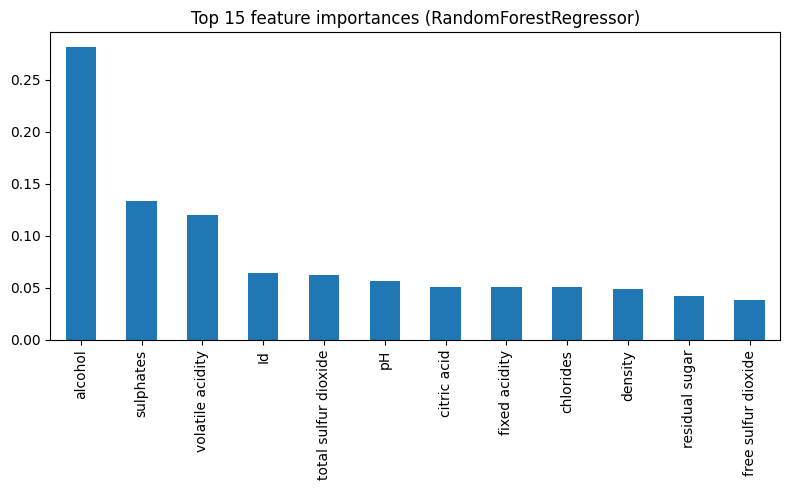

In [ ]:
# Cell 9 - feature importances
import matplotlib.pyplot as plt
%matplotlib inline

feat_imp = pd.Series(best_rfr.feature_importances_, index=numeric_cols).sort_values(ascending=False)
print("Top features (regression importance):")
display(feat_imp.head(10))

plt.figure(figsize=(8,5))
feat_imp.head(15).plot(kind='bar')
plt.title("Top 15 feature importances (RandomForestRegressor)")
plt.tight_layout()
plt.show()


In [ ]:
# Cell 10 - sample predictions and save CSVs / model
sample_X = X_test_proc.head(10)
sample_preds = pd.DataFrame({
    'pred_lr': lr.predict(sample_X),
    'pred_rfr': best_rfr.predict(sample_X),
    'actual_quality': y_test.loc[sample_X.index].values
})
display(sample_X.reset_index(drop=True))
display(sample_preds)

# Save test predictions full
preds_all = pd.DataFrame({'actual': y_test, 'pred_rfr': best_rfr.predict(X_test_proc)})
preds_all.to_csv("wine_test_predictions.csv", index=False)
print("Saved predictions to wine_test_predictions.csv")

# Save cleaned dataset copy
df.to_csv("wine_cleaned.csv", index=False)
print("Saved cleaned dataset to wine_cleaned.csv")

# Save model with joblib
import joblib
joblib.dump(best_rfr, "wine_rfr_model.joblib")
print("Saved RandomForestRegressor model to wine_rfr_model.joblib")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-1.788563,-1.066716,-1.389001,-0.600511,-0.747536,1.153646,0.518047,-2.685004,2.401986,0.765947,3.337147,-1.427214
1,0.274426,0.388684,0.095670,-0.264324,0.210652,-1.042777,-0.930272,1.082009,0.324101,-0.961497,-1.266077,-0.385139
2,-0.413237,-0.562923,0.095670,-0.348371,-0.248480,0.354947,0.608567,0.234431,0.583837,-0.097775,-0.890303,0.919608
3,-0.871679,-0.283039,-0.979437,-0.600511,-0.268442,2.451532,0.548220,-0.754410,-1.234313,-0.961497,-0.796360,0.603110
4,-0.355932,0.388684,-1.389001,0.071863,-0.647725,-0.843102,-0.990619,-0.178894,0.453969,-0.558427,0.330960,-0.025580
5,-1.100900,-0.339016,0.658820,-0.096231,-0.328329,-0.743264,-0.809579,-0.225982,1.622779,0.420458,0.143073,1.305004
6,-1.043595,2.067992,-1.389001,-0.768605,-0.707612,-0.643427,-0.869926,-1.078792,1.233176,-0.155357,0.424903,1.399738
7,0.446341,-1.402577,1.068385,-0.600511,-0.408178,1.053809,0.005100,-0.016703,0.064366,2.205483,0.143073,-0.932013
8,1.305920,-1.234647,1.119580,-0.012184,-0.408178,-0.942939,-0.749233,1.029689,-0.325238,1.169017,0.237017,-0.555230
9,-0.126711,1.116385,-1.389001,-0.012184,-0.128706,-0.343915,-0.658713,0.652988,0.453969,-1.134241,-0.796360,0.932526


,pred_lr,pred_rfr,actual_quality
0,6.974644,6.330000,6
1,5.026642,5.038781,5
2,5.388572,5.326093,5
3,5.518928,5.199369,5
4,5.718110,5.142491,5
5,5.747581,5.984245,6
6,5.399792,5.260009,6
7,6.385621,6.421267,6
8,6.235507,6.626049,6
9,5.052417,5.080753,4


Saved predictions to wine_test_predictions.csv
Saved cleaned dataset to wine_cleaned.csv
Saved RandomForestRegressor model to wine_rfr_model.joblib


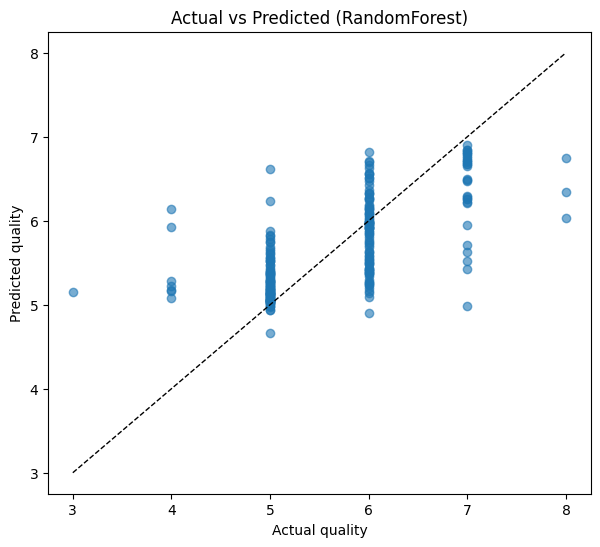

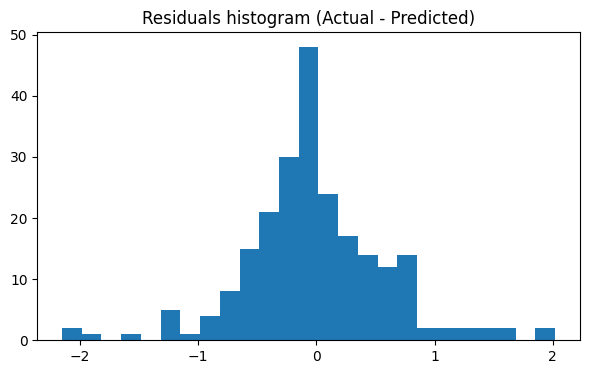

In [ ]:
# Cell 11 - plots
y_pred_final = best_rfr.predict(X_test_proc)

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Actual vs Predicted (RandomForest)')
plt.show()

resid = y_test - y_pred_final
plt.figure(figsize=(7,4))
plt.hist(resid, bins=25)
plt.title('Residuals histogram (Actual - Predicted)')
plt.show()
